# 딥러닝3 : 다중분류


## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv"
data = pd.read_csv(path)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2.데이터 준비

### (1) y 값을 0,1,2로 변환하기
(sparse_categorical_crossentropy 사용을 위해)

In [4]:
data['Species'] = data['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### (2) 데이터 준비

In [5]:
target = 'Species'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) 데이터 분할 : train : val

In [6]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

### (4) Scaling

In [9]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링1

### (1) 모델 설계

In [10]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [21]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential( Dense(3, input_shape = (nfeatures,), activation = 'softmax') )

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (2) compile + 학습

In [22]:
# y->정수 인코딩 -> loss: sparse_categorical_crossentropy
# y->원핫 인코딩 -> loss: categorical_crossentropy

model.compile(optimizer=Adam(learning_rate=0.1), loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50,
                    validation_split=0.2).history

Epoch 1/50
3/3 [==============================] - 0s 79ms/step - loss: 1.1045 - val_loss: 0.9328
Epoch 2/50
3/3 [==============================] - 0s 17ms/step - loss: 0.9483 - val_loss: 0.8348
Epoch 3/50
3/3 [==============================] - 0s 16ms/step - loss: 0.8523 - val_loss: 0.7274
Epoch 4/50
3/3 [==============================] - 0s 16ms/step - loss: 0.7497 - val_loss: 0.6468
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 0.6684 - val_loss: 0.5763
Epoch 6/50
3/3 [==============================] - 0s 21ms/step - loss: 0.6142 - val_loss: 0.5247
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 0.5677 - val_loss: 0.4680
Epoch 8/50
3/3 [==============================] - 0s 21ms/step - loss: 0.5234 - val_loss: 0.4310
Epoch 9/50
3/3 [==============================] - 0s 16ms/step - loss: 0.4954 - val_loss: 0.4063
Epoch 10/50
3/3 [==============================] - 0s 17ms/step - loss: 0.4691 - val_loss: 0.3864
Epoch 11/50
3/3 [============

* 학습결과 그래프

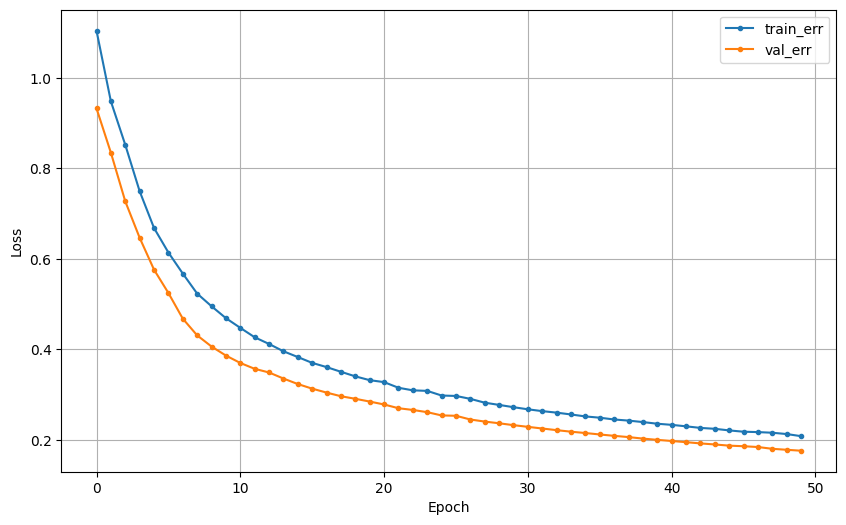

In [23]:
dl_history_plot(history)

### (3) 예측 및 검증
* 예측 결과는 softmax로 변환된 값 입니다.

In [24]:
pred = model.predict(x_val)
pred[:5]

2/2 [==============================] - 0s 4ms/step


array([[9.7328073e-01, 2.6571484e-02, 1.4776443e-04],
       [1.5619253e-02, 8.0779123e-01, 1.7658944e-01],
       [1.8368071e-02, 7.2625637e-01, 2.5537547e-01],
       [8.7328569e-04, 4.0491399e-01, 5.9421271e-01],
       [4.1179523e-02, 8.7599981e-01, 8.2820617e-02]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [25]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([0, 1, 1, 2, 1])

In [26]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)
pred_1

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       2])

* 실제값 y_val은 0,1,2 로 된 1차원 값입니다.

In [27]:
y_val

47     0
73     1
74     1
129    2
67     1
89     1
143    2
21     0
108    2
12     0
147    2
76     1
119    2
35     0
28     0
122    2
13     0
58     1
114    2
57     1
50     1
149    2
111    2
20     0
72     1
81     1
98     1
34     0
104    2
133    2
95     1
88     1
0      0
46     0
11     0
106    2
85     1
1      0
51     1
130    2
55     1
134    2
37     0
65     1
56     1
Name: Species, dtype: int64

In [28]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 17  1]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.81      0.94      0.87        18
           2       0.91      0.71      0.80        14

    accuracy                           0.89        45
   macro avg       0.91      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



----

## 4.모델링2 : hidden layer

### (1) 모델1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [29]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(8, input_shape = (nfeatures,), activation = 'relu'),
                    Dense(3, activation = 'softmax')
])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile + 학습

In [31]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50,
                    validation_split=0.2).history

Epoch 1/50
3/3 [==============================] - 1s 150ms/step - loss: 1.0872 - val_loss: 1.0676
Epoch 2/50
3/3 [==============================] - 0s 69ms/step - loss: 1.0428 - val_loss: 1.0327
Epoch 3/50
3/3 [==============================] - 0s 82ms/step - loss: 1.0095 - val_loss: 1.0048
Epoch 4/50
3/3 [==============================] - 0s 93ms/step - loss: 0.9846 - val_loss: 0.9804
Epoch 5/50
3/3 [==============================] - 0s 56ms/step - loss: 0.9622 - val_loss: 0.9556
Epoch 6/50
3/3 [==============================] - 0s 34ms/step - loss: 0.9395 - val_loss: 0.9324
Epoch 7/50
3/3 [==============================] - 0s 43ms/step - loss: 0.9171 - val_loss: 0.9053
Epoch 8/50
3/3 [==============================] - 0s 17ms/step - loss: 0.8912 - val_loss: 0.8759
Epoch 9/50
3/3 [==============================] - 0s 16ms/step - loss: 0.8650 - val_loss: 0.8487
Epoch 10/50
3/3 [==============================] - 0s 18ms/step - loss: 0.8406 - val_loss: 0.8232
Epoch 11/50
3/3 [===========

* 학습결과 그래프

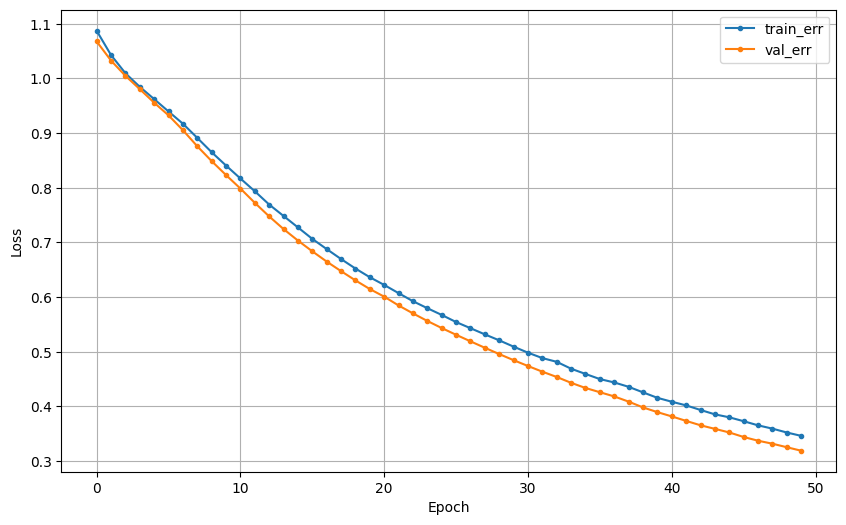

In [32]:
dl_history_plot(history)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [33]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1)

2/2 [==============================] - 0s 9ms/step


In [34]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 12  6]
 [ 0  3 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.80      0.67      0.73        18
           2       0.65      0.79      0.71        14

    accuracy                           0.80        45
   macro avg       0.82      0.82      0.81        45
weighted avg       0.81      0.80      0.80        45



### (2) 모델2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) | 72 | node, activation = 'relu'  |
| dense_2 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [36]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(8, input_shape = (nfeatures,), activation = 'relu'),
                    Dense(8, activation = 'relu'),
                    Dense(3, activation = 'softmax')
])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile + 학습

In [37]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50,
                    validation_split=0.2).history

Epoch 1/50
3/3 [==============================] - 1s 85ms/step - loss: 1.0949 - val_loss: 1.0791
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 1.0547 - val_loss: 1.0540
Epoch 3/50
3/3 [==============================] - 0s 21ms/step - loss: 1.0340 - val_loss: 1.0386
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 1.0112 - val_loss: 1.0110
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 0.9831 - val_loss: 0.9733
Epoch 6/50
3/3 [==============================] - 0s 16ms/step - loss: 0.9527 - val_loss: 0.9289
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 0.9126 - val_loss: 0.8887
Epoch 8/50
3/3 [==============================] - 0s 18ms/step - loss: 0.8759 - val_loss: 0.8463
Epoch 9/50
3/3 [==============================] - 0s 16ms/step - loss: 0.8345 - val_loss: 0.7984
Epoch 10/50
3/3 [==============================] - 0s 17ms/step - loss: 0.7886 - val_loss: 0.7454
Epoch 11/50
3/3 [============

* 학습결과 그래프

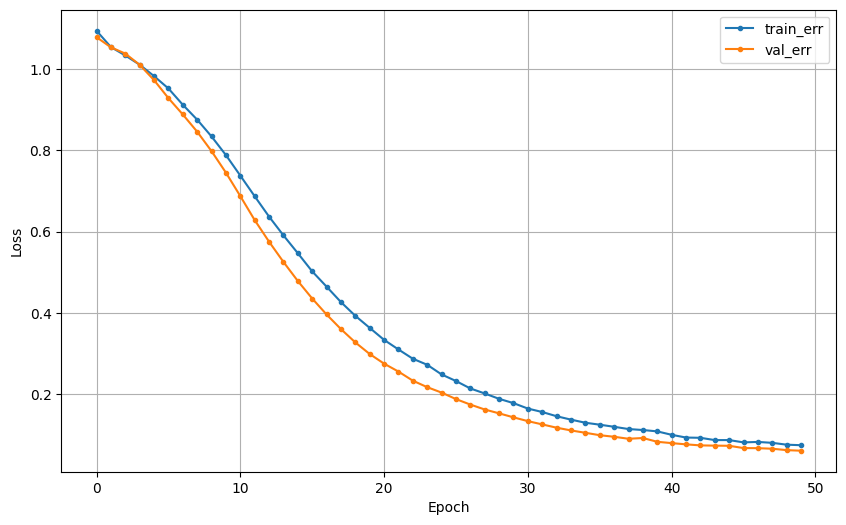

In [38]:
dl_history_plot(history)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [40]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis = 1)

2/2 [==============================] - 0s 12ms/step


In [41]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 18  0]
 [ 0  3 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92        18
           2       1.00      0.79      0.88        14

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



## 5.참조 : y를 one-hot encoding 하여 모델링

* y 가변수화 : to_categorical
* 컴파일에서 loss = 'categorical_crossentropy'

In [42]:
from keras.utils import to_categorical

### (1) y에 대한 가변수화

In [43]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [44]:
y_c = to_categorical(y.values, 3)

In [45]:
y_c[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

### (2) 데이터 분할2 : train : val

In [46]:
x_train, x_val, y_train, y_val = train_test_split(x, y_c, test_size = .3, random_state = 2022)

### (3) Scaling

In [47]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (4) 모델 설계

In [48]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [49]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential([Dense(3, input_shape = (nfeatures,), activation = 'softmax')])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (5) compile + 학습

* lr과 learning_rate은 같은 의미 입니다. 그러나 향후 버전에서는 lr이 제외될 예정이라고 합니다.
* y를 one-hot encoding 했다면, loss fuction은 **categorical_crossentropy** 입니다.

In [50]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 100,
                    validation_split=0.2).history

Epoch 1/100
3/3 [==============================] - 1s 297ms/step - loss: 1.1791 - val_loss: 1.1157
Epoch 2/100
3/3 [==============================] - 0s 45ms/step - loss: 1.0018 - val_loss: 0.9709
Epoch 3/100
3/3 [==============================] - 0s 60ms/step - loss: 0.9036 - val_loss: 0.8030
Epoch 4/100
3/3 [==============================] - 0s 49ms/step - loss: 0.7586 - val_loss: 0.6851
Epoch 5/100
3/3 [==============================] - 0s 56ms/step - loss: 0.6851 - val_loss: 0.6130
Epoch 6/100
3/3 [==============================] - 0s 55ms/step - loss: 0.6219 - val_loss: 0.5469
Epoch 7/100
3/3 [==============================] - 0s 41ms/step - loss: 0.5675 - val_loss: 0.4946
Epoch 8/100
3/3 [==============================] - 0s 53ms/step - loss: 0.5367 - val_loss: 0.4639
Epoch 9/100
3/3 [==============================] - 0s 35ms/step - loss: 0.5064 - val_loss: 0.4360
Epoch 10/100
3/3 [==============================] - 0s 40ms/step - loss: 0.4774 - val_loss: 0.4179
Epoch 11/100
3/3 [

* 학습결과 그래프

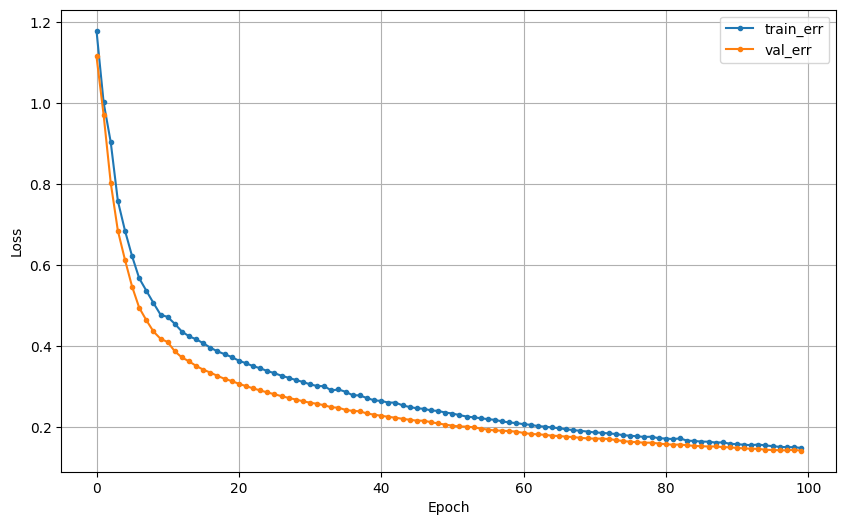

In [51]:
dl_history_plot(history)

### (6) 예측 및 평가
* 예측 결과는 softmax로 변환된 값 입니다.

In [52]:
pred = model.predict(x_val)
pred[:5]

2/2 [==============================] - 0s 12ms/step


array([[1.5446387e-05, 6.1852671e-02, 9.3813187e-01],
       [7.6915796e-07, 7.3627554e-02, 9.2637163e-01],
       [9.6792960e-01, 3.2068674e-02, 1.6182352e-06],
       [3.5363203e-04, 3.6293352e-01, 6.3671291e-01],
       [9.8311591e-01, 1.6883541e-02, 4.5212087e-07]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [53]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([2, 2, 0, 2, 0])

In [54]:
y_val

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [55]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)
pred_1

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2])

* 실제값 y_val도 원래 대로 돌려 놓습니다.

In [56]:
y_val[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [57]:
y_val_1 = y_val.argmax(axis=1)
y_val_1

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2])

In [58]:
print(confusion_matrix(y_val_1, pred_1))
print(classification_report(y_val_1, pred_1))

[[14  0  0]
 [ 0 14  1]
 [ 0  2 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.93      0.90        15
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

